In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


calendar=pd.read_csv("calendar.csv")
listings=pd.read_csv("listings.csv")
reviews=pd.read_csv("reviews.csv")


Checking registration year for every listing in Seattle Aribnb Data, in order to understand if there is any upward trend for hosts to rent new premises.

In [2]:
listings['host_since']=pd.to_datetime(listings['host_since'])
listings['reg_year']=listings['host_since'].dt.year

listings_by_year=listings.groupby('reg_year')['id'].nunique()

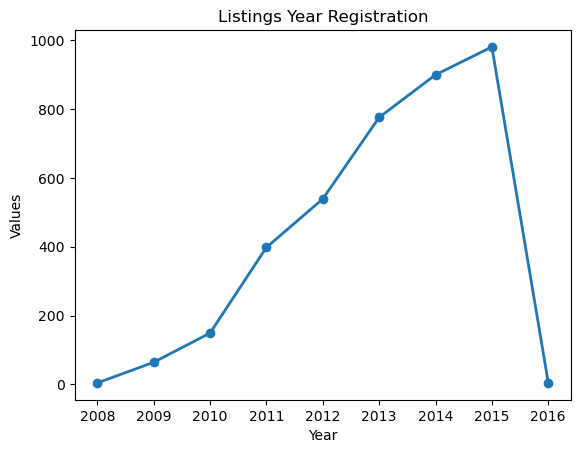

In [3]:
plt.title('Listings Year Registration')
listings_by_year.plot(marker='o', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()

In [46]:
#Convert date into datetime to extract year and month.
calendar['date']=pd.to_datetime(calendar['date'])
calendar['year']=calendar['date'].dt.year
calendar['month']=calendar['date'].dt.month


 Getting all booked dates from calendar dataframe to better understand the trend of customers demand in Seattle

In [47]:
calendar_not_aval=calendar[calendar['available']=='f']

bookings_per_year=calendar_not_aval.groupby(['year','month'])['listing_id'].sum()
bookings_per_year

year  month
2016  1        273260081207
      2        217371685232
      3        204980819855
      4        236970490519
      5        238301502544
      6        236292415327
      7        270875009777
      8        256805181377
      9        227900270967
      10       219093825459
      11       198247835597
      12       184935584481
2017  1         11205454808
Name: listing_id, dtype: int64

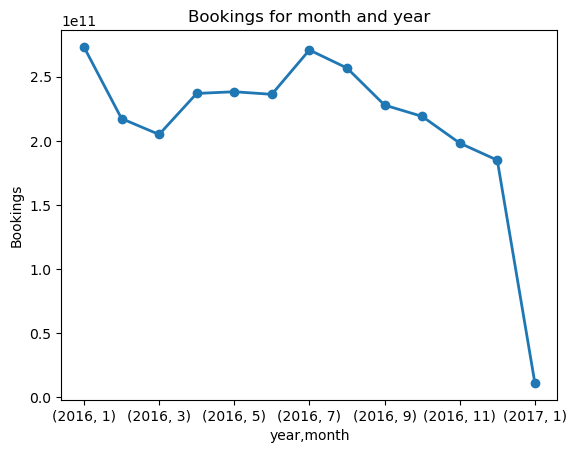

In [48]:
plt.title('Bookings for month and year')
bookings_per_year.plot(marker='o', linestyle='-', linewidth=2)
plt.ylabel('Bookings')
plt.show()

From the reviews dataframe we do the same thing to understand also number of reviews listings are getting through time.

In [53]:
reviews['date']=pd.to_datetime(reviews['date'])
reviews['year']=reviews['date'].dt.year
reviews['month']=reviews['date'].dt.month

reviews_by_year=reviews.groupby('year')['listing_id'].sum()

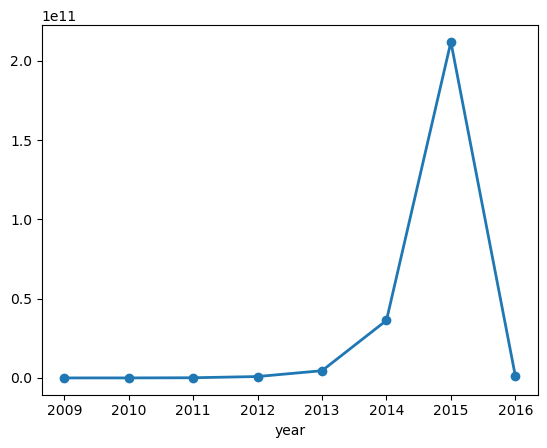

In [54]:
reviews_by_year.plot(marker='o', linestyle='-', linewidth=2)
plt.show()